# Задача
В этой работе вам предлагается решить задачу регрессии, а именно построить алгоритм, определяющий качество вина на основе физико-химических тестов:
 - fixed acidity
 - volatile acidity
 - citric acid
 - residual sugar
 - chlorides
 - free sulfur dioxide
 - total sulfur dioxide
 - density
 - pH
 - sulphates
 - alcohol 
 
Более подробно про признаки можно почитать [здесь](https://archive.ics.uci.edu/ml/datasets/wine+quality). Целевой признак записан в переменной *quality*.

В этой задаче для обучения будут использовать 2 алгоритма:
- [DecisonTree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
- [AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor)

# Решение

Загрузите набор данных *winequality-red.csv* с помощью `pandas` (скачать можно [здесь](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv), или с помощью скрипта ниже). Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [4]:
import pandas as pd

url =  "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
# your code here
df = pd.read_csv(url, decimal='.', delimiter=';')

df.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Анализ и предобработка данных

Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем: 
1. Проверьте есть ли в данных пропущенные значения. Удалите из выборки все объекты с пропусками и дубликаты.
2. Выделите 70% выборки для обучения и дальнейшего анализа.
3. Проанализируйте признаки и по необходимости предобработайте их. Все шаги предобработки поясните текстом.
4. Целевую переменную (ту, которую мы хотим предсказывать) можно выделить в отдельную переменную (НЕ забудьте удалить ее из датасета, когда будете обучать модель).

In [5]:
from sklearn.model_selection import train_test_split

# 1. Проверка на пропущенные значения и дубликаты
print("Пропущенные значения в данных:")
print(df.isnull().sum())

# Удаление пропусков и дубликатов
data = df.dropna()
data = data.drop_duplicates()

# 2. Разделение данных на обучающую (70%) и тестовую (30%) выборки
X = data.drop('quality', axis=1)  # Признаки
y = data['quality']  # Целевая переменная

# Разделение данных (random_state для воспроизводимости)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

# 3. Анализ признаков
print("\nАнализ типов данных:")
print(X_train.dtypes)

# Убедимся, что все признаки числовые, так как у нас нет категориальных данных
# Если есть категориальные данные, их нужно было бы закодировать с помощью OneHotEncoder или LabelEncoder

# 4. Вывод итоговых данных
print("\nПример данных для обучения:")
print(X_train.head())
print("\nЦелевая переменная (quality):")
print(y_train.head())

# Дальше можно переходить к построению моделей: DecisionTree и AdaBoostRegressor


Пропущенные значения в данных:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Размер обучающей выборки: (951, 11)
Размер тестовой выборки: (408, 11)

Анализ типов данных:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

Пример данных для обучения:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
374            14.0              0.41         0.63             3.8      0.0

## Обучение модели регрессии

Постройте модель регрессии, используя 2 алгоритма:
- [DecisonTree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
- [AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor)

Для начала используйте гиперпараметры по умолчанию.

Рассчитайте среднее качество кросс-валидации модели как долю дисперсии зависимой переменной (коэффициент детерминации) $R^2$. Каким получилось качество? Какой алгоритм вы бы выбрали для дальнейшей работы? Обоснуйте свой выбор.

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# 1. DecisionTreeRegressor с гиперпараметрами по умолчанию
dt_regressor = DecisionTreeRegressor(random_state=42)

# 2. AdaBoostRegressor с DecisionTreeRegressor в качестве базового алгоритма
ada_regressor = AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=42), random_state=42)

# 3. Оценка качества моделей с использованием кросс-валидации (R^2)
# Используем кросс-валидацию с 5 фолдами для каждой модели

# Для DecisionTreeRegressor
dt_scores = cross_val_score(dt_regressor, X_train, y_train, cv=5, scoring='r2')

# Для AdaBoostRegressor
ada_scores = cross_val_score(ada_regressor, X_train, y_train, cv=5, scoring='r2')

# 4. Вывод средних значений R^2
print(f"Средний коэффициент R^2 для DecisionTree: {np.mean(dt_scores):.4f}")
print(f"Средний коэффициент R^2 для AdaBoostRegressor: {np.mean(ada_scores):.4f}")


Средний коэффициент R^2 для DecisionTree: -0.2231
Средний коэффициент R^2 для AdaBoostRegressor: 0.1935


Теперь сделаем подбор оптимальных гиперпараметров. Сделайте поиск по сетке с помощью кросс-валидации. Изменилось ли качество алгоритмов? Почему?

In [9]:
from sklearn.model_selection import GridSearchCV

# Зададим сетку параметров для AdaBoostRegressor
param_grid = {
    'n_estimators': [50, 100, 200],         # Количество деревьев
    'learning_rate': [0.01, 0.1, 1],        # Темп обучения
    'base_estimator__max_depth': [1, 3, 5]  # Максимальная глубина дерева решений
}

# Создаем экземпляр AdaBoostRegressor
ada_regressor = AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=42), random_state=42)

# GridSearchCV для подбора гиперпараметров с 5-кратной кросс-валидацией
grid_search = GridSearchCV(ada_regressor, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Обучаем GridSearchCV на тренировочных данных
grid_search.fit(X_train, y_train)

# Получаем наилучшие параметры
best_params = grid_search.best_params_
print(f"Лучшие параметры: {best_params}")

# Получаем наилучшую модель
best_ada_model = grid_search.best_estimator_

# Оцениваем модель с наилучшими параметрами
best_scores = cross_val_score(best_ada_model, X_train, y_train, cv=5, scoring='r2')

print(f"Средний коэффициент R^2 для оптимизированной AdaBoost: {np.mean(best_scores):.4f}")


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostRegressor is deprecated in favor of 'estimator'. See AdaBoostRegressor's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostRegressor is deprecated in favor of 'estimator'. See AdaBoostRegressor's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostRegressor is deprecated in favor of 'estimator'. See AdaBoostRegressor's docstring for more details.
  estimator = estimator.set_pa

Лучшие параметры: {'base_estimator__max_depth': 5, 'learning_rate': 0.1, 'n_estimators': 200}
Средний коэффициент R^2 для оптимизированной AdaBoost: 0.3484


Оцените скорость обучения каждого из алгоритмов. Для этого воспользуйтесь графиком вида "ящик с усами", который отражает среднее время обучения алгоритма при фиксированном значении гиперпараметров. Что вы можете сказать о скорости работы алгоритмов? Почему наблюдаются такие результаты? Можно ли ускорить? Если да, то каким образом?

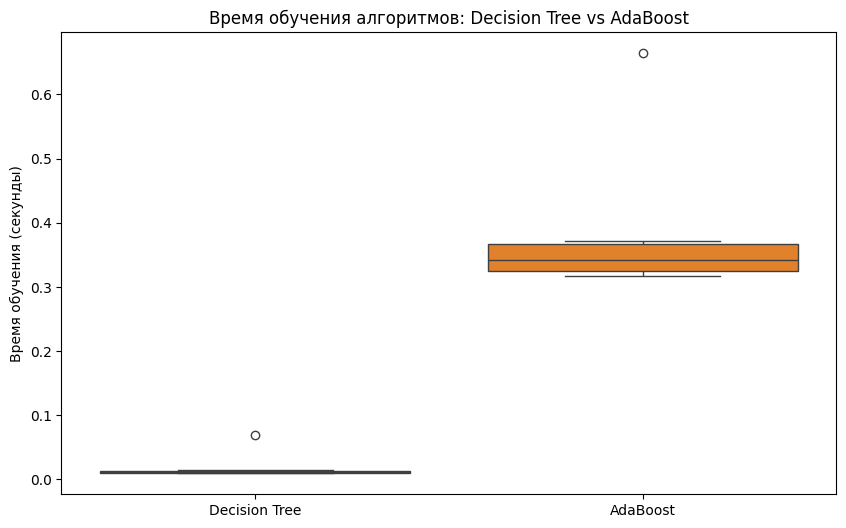

In [10]:
import time
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Массивы для хранения времени обучения
dt_times = []
ada_times = []

# Создаем модели с фиксированными гиперпараметрами
dt_regressor = DecisionTreeRegressor(random_state=42)
ada_regressor = AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=42, max_depth=3), n_estimators=100, random_state=42)

# Замер времени обучения для каждой модели
n_repeats = 10  # Количество повторений для каждой модели

for _ in range(n_repeats):
    # Для DecisionTreeRegressor
    start_time = time.time()
    dt_regressor.fit(X_train, y_train)
    dt_times.append(time.time() - start_time)
    
    # Для AdaBoostRegressor
    start_time = time.time()
    ada_regressor.fit(X_train, y_train)
    ada_times.append(time.time() - start_time)

# Построение графика "ящик с усами"
times_data = {
    'Decision Tree': dt_times,
    'AdaBoost': ada_times
}

# Создаем DataFrame для визуализации
times_df = pd.DataFrame(times_data)

# Построение boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=times_df)
plt.title("Время обучения алгоритмов: Decision Tree vs AdaBoost")
plt.ylabel("Время обучения (секунды)")
plt.show()


Анализ скорости работы:
- Decision Tree обычно обучается быстрее, так как он строит одно дерево решений.
- AdaBoost обучается медленнее, потому что он строит ансамбль из нескольких деревьев (в нашем случае 100 деревьев), что требует больше времени.

Почему такие результаты?
- Decision Tree: Строит одно дерево, и сложность алгоритма зависит от глубины дерева. Время обучения линейно связано с количеством объектов и признаков.
- AdaBoost: Этот алгоритм строит несколько деревьев последовательно, и каждое новое дерево настраивается на ошибки предыдущего. Поэтому с увеличением числа деревьев время обучения увеличивается.

Как ускорить обучение:
- Уменьшить количество деревьев (n_estimators): Для AdaBoost можно уменьшить количество деревьев в ансамбле. Это снизит время обучения, но может привести к ухудшению точности модели.
- Ограничить глубину деревьев (max_depth): Слишком глубокие деревья усложняют модель и увеличивают время обучения. Использование небольших деревьев ускорит процесс обучения.
- Параллелизация: Если в системе доступно несколько ядер процессора, можно ускорить обучение за счет параллельного выполнения. В AdaBoostRegressor есть параметр n_jobs, который позволяет использовать несколько ядер процессора.
- Применение методов сэмплирования: Для ускорения обучения на больших наборах данных можно использовать методы уменьшения выборки, такие как случайное сэмплирование, чтобы обучаться на меньшем количестве данных. Это ускорит обучение, но может снизить точность модели.

## PCA преобразование

Теперь попробуем сделать преобразрование данных с помощью PCA. Выберите оптимальное количество компонент и преобразуйте данные. Объясните свой выбор.

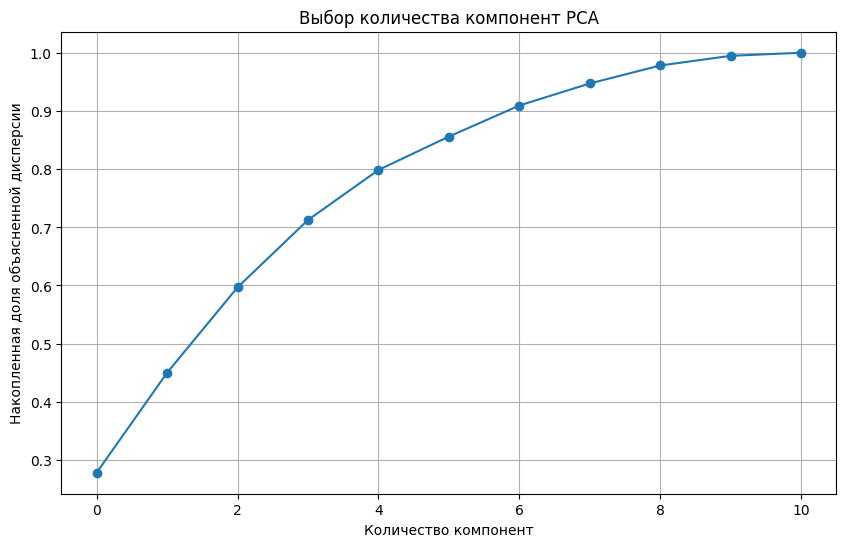

In [11]:
from sklearn.preprocessing import StandardScaler

# Стандартизация данных (за исключением целевой переменной)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Применение PCA
pca = PCA()
pca.fit(X_scaled)

# Доли объясненной дисперсии каждой компонентой
explained_variance = pca.explained_variance_ratio_

# Построение графика накопленной доли объясненной дисперсии
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Количество компонент')
plt.ylabel('Накопленная доля объясненной дисперсии')
plt.title('Выбор количества компонент PCA')
plt.grid(True)
plt.show()

In [22]:
# Допустим, мы выбираем количество компонент, которое объясняет 90% дисперсии
optimal_components = np.argmax(np.cumsum(explained_variance) >= 0.90)
print(f"Оптимальное количество компонент: {optimal_components}")

Оптимальное количество компонент: 6


In [23]:
# Преобразование данных с оптимальным количеством компонент
pca_optimal = PCA(n_components=optimal_components)
X_pca = pca_optimal.fit_transform(X_scaled)

# Выводим форму нового датасета
print(f"Новая форма данных после PCA: {X_pca.shape}")

Новая форма данных после PCA: (951, 6)


## Обучение моделей на данных, трансформированных с помощью PCA

Обучим те же классификаторы на трансформированных с помощью PCA данных. Подберите оптимальные значения исследуемых гиперпараметров для новых данных. Какой алгоритм справился лучше? Какой быстрее? Почему?

In [24]:
# Преобразование данных с оптимальным количеством компонент
pca_optimal = PCA(n_components=optimal_components)
X_pca_train = pca_optimal.fit_transform(X_scaled)
X_pca_test = pca_optimal.transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Настройка гиперпараметров для DecisionTreeRegressor
param_grid_dt = {
    'max_depth': [3, 5, 10, None],  # Глубина дерева
    'min_samples_split': [2, 10, 20],  # Минимальное количество объектов для разделения
    'min_samples_leaf': [1, 5, 10]  # Минимальное количество объектов в листе
}

# Инициализация модели DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# GridSearchCV для подбора гиперпараметров
grid_search_dt = GridSearchCV(dt_regressor, param_grid_dt, cv=5, scoring='r2', n_jobs=-1)
grid_search_dt.fit(X_pca_train, y_train)

# Наилучшие параметры
best_dt_params = grid_search_dt.best_params_
print(f"Лучшие параметры для DecisionTree: {best_dt_params}")

# Оценка модели
best_dt_score = grid_search_dt.best_score_
print(f"Средний коэффициент R^2 для DecisionTree на данных после PCA: {best_dt_score:.4f}")

Лучшие параметры для DecisionTree: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
Средний коэффициент R^2 для DecisionTree на данных после PCA: 0.2456


In [26]:
from sklearn.ensemble import AdaBoostRegressor

# Настройка гиперпараметров для AdaBoostRegressor
param_grid_ada = {
    'n_estimators': [50, 100, 200],         # Количество деревьев
    'learning_rate': [0.01, 0.1, 1],        # Темп обучения
    'base_estimator__max_depth': [1, 3, 5]  # Максимальная глубина дерева решений
}

# Инициализация модели AdaBoostRegressor
ada_regressor = AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=42), random_state=42)

# GridSearchCV для подбора гиперпараметров
grid_search_ada = GridSearchCV(ada_regressor, param_grid_ada, cv=5, scoring='r2', n_jobs=-1)
grid_search_ada.fit(X_pca_train, y_train)

# Наилучшие параметры
best_ada_params = grid_search_ada.best_params_
print(f"Лучшие параметры для AdaBoost: {best_ada_params}")

# Оценка модели
best_ada_score = grid_search_ada.best_score_
print(f"Средний коэффициент R^2 для AdaBoost на данных после PCA: {best_ada_score:.4f}")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostRegressor is deprecated in favor of 'estimator'. See AdaBoostRegressor's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostRegressor is deprecated in favor of 'estimator'. See AdaBoostRegressor's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostRegressor is deprecated in favor of 'estimator'. See AdaBoostRegressor's docstring for more details.
  estimator = estimator.set_pa

Лучшие параметры для AdaBoost: {'base_estimator__max_depth': 5, 'learning_rate': 0.01, 'n_estimators': 200}
Средний коэффициент R^2 для AdaBoost на данных после PCA: 0.2977


In [27]:
import time

# Замер времени для DecisionTreeRegressor
start_time = time.time()
grid_search_dt.fit(X_pca_train, y_train)
dt_time = time.time() - start_time
print(f"Время обучения DecisionTree: {dt_time:.4f} секунд")

# Замер времени для AdaBoostRegressor
start_time = time.time()
grid_search_ada.fit(X_pca_train, y_train)
ada_time = time.time() - start_time
print(f"Время обучения AdaBoost: {ada_time:.4f} секунд")


Время обучения DecisionTree: 0.7369 секунд


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostRegressor is deprecated in favor of 'estimator'. See AdaBoostRegressor's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostRegressor is deprecated in favor of 'estimator'. See AdaBoostRegressor's docstring for more details.
  estimator = estimator.set_params(**clone(parameters, safe=False))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:717: FutureWarning: Parameter 'base_estimator' of AdaBoostRegressor is deprecated in favor of 'estimator'. See AdaBoostRegressor's docstring for more details.
  estimator = estimator.set_pa

Время обучения AdaBoost: 23.4715 секунд


## Сравнение результатов

Сравните результаты полученные до трансформации данных с помощью PCA и после. Для этого воспользуйтесь "ящиком с усами" (boxplot).

Сделайте общие итоговые выводы о моделях регрессии с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

In [28]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Настройка модели
dt_regressor = DecisionTreeRegressor(random_state=42)
ada_regressor = AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=42), random_state=42)

# Результаты кросс-валидации для моделей на исходных данных
dt_scores_before = cross_val_score(dt_regressor, X_scaled, y_train, cv=5, scoring='r2')
ada_scores_before = cross_val_score(ada_regressor, X_scaled, y_train, cv=5, scoring='r2')

# Преобразование данных с помощью PCA
X_pca_train = pca_optimal.fit_transform(X_scaled)
X_pca_test = pca_optimal.transform(X_test)

# Результаты кросс-валидации для моделей на данных после PCA
dt_scores_after = cross_val_score(dt_regressor, X_pca_train, y_train, cv=5, scoring='r2')
ada_scores_after = cross_val_score(ada_regressor, X_pca_train, y_train, cv=5, scoring='r2')

# Выводим средние значения и дисперсию R^2 для каждой модели
print(f"DecisionTree до PCA: Средний R^2 = {np.mean(dt_scores_before):.4f}, Разброс = {np.std(dt_scores_before):.4f}")
print(f"AdaBoost до PCA: Средний R^2 = {np.mean(ada_scores_before):.4f}, Разброс = {np.std(ada_scores_before):.4f}")
print(f"DecisionTree после PCA: Средний R^2 = {np.mean(dt_scores_after):.4f}, Разброс = {np.std(dt_scores_after):.4f}")
print(f"AdaBoost после PCA: Средний R^2 = {np.mean(ada_scores_after):.4f}, Разброс = {np.std(ada_scores_after):.4f}")


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


DecisionTree до PCA: Средний R^2 = -0.2161, Разброс = 0.1182
AdaBoost до PCA: Средний R^2 = 0.1986, Разброс = 0.0490
DecisionTree после PCA: Средний R^2 = -0.3802, Разброс = 0.0403
AdaBoost после PCA: Средний R^2 = 0.0949, Разброс = 0.0500


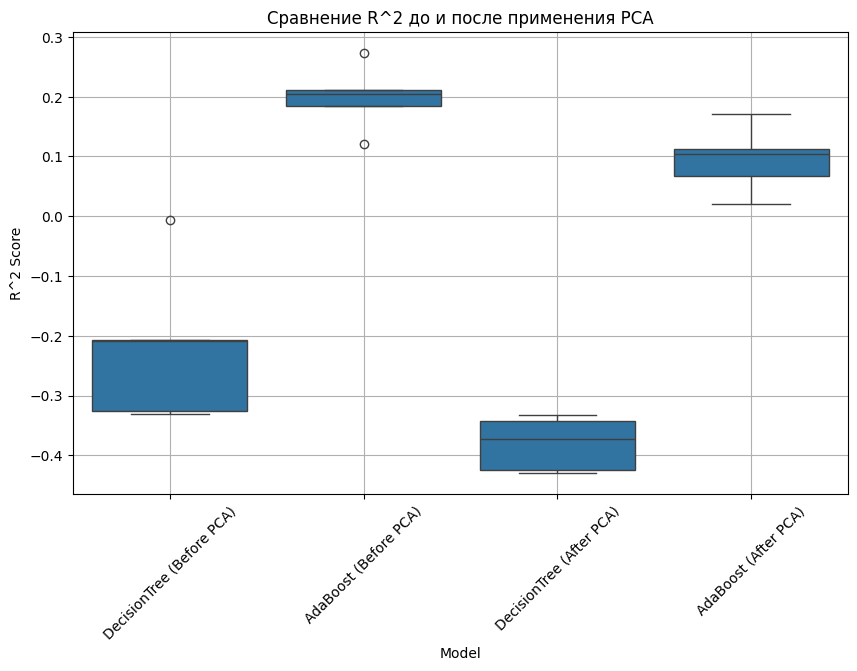

In [29]:
# Объединяем результаты в один DataFrame для визуализации
import pandas as pd

# Создаем DataFrame
data = []
models = ['DecisionTree (Before PCA)', 'AdaBoost (Before PCA)', 
          'DecisionTree (After PCA)', 'AdaBoost (After PCA)']
scores = [dt_scores_before, ada_scores_before, dt_scores_after, ada_scores_after]

# Преобразование в удобный формат для визуализации
for model, score_list in zip(models, scores):
    for score in score_list:
        data.append([model, score])

df = pd.DataFrame(data, columns=['Model', 'R^2 Score'])

# Построение boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='R^2 Score', data=df)
plt.title('Сравнение R^2 до и после применения PCA')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Тестирование всех модели

Протестируйте все построенные модели (в т.ч. с и без PCA трансформации) на данных, которые были отложены для теста (их должно было остаться 30%). Не забудьте про все необходимые преобразования.

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error

# Масштабируем тестовые данные так же, как тренировочные
X_test_scaled = scaler.transform(X_test)

# Преобразование с помощью PCA для тестовой выборки
X_test_pca = pca_optimal.transform(X_test_scaled)

# Обучение моделей на тренировочных данных (без PCA)
dt_regressor.fit(X_scaled, y_train)
ada_regressor.fit(X_scaled, y_train)

# Обучение моделей на данных после PCA
dt_regressor_pca = DecisionTreeRegressor(random_state=42)
ada_regressor_pca = AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=42), random_state=42)

dt_regressor_pca.fit(X_pca_train, y_train)
ada_regressor_pca.fit(X_pca_train, y_train)

# Прогнозы для тестовой выборки (без PCA)
y_pred_dt = dt_regressor.predict(X_test_scaled)
y_pred_ada = ada_regressor.predict(X_test_scaled)

# Прогнозы для тестовой выборки (с PCA)
y_pred_dt_pca = dt_regressor_pca.predict(X_test_pca)
y_pred_ada_pca = ada_regressor_pca.predict(X_test_pca)

# Оценка моделей на тестовых данных
print("Результаты на тестовой выборке:")
print(f"DecisionTree без PCA: R^2 = {r2_score(y_test, y_pred_dt):.4f}, MAE = {mean_absolute_error(y_test, y_pred_dt):.4f}")
print(f"AdaBoost без PCA: R^2 = {r2_score(y_test, y_pred_ada):.4f}, MAE = {mean_absolute_error(y_test, y_pred_ada):.4f}")

print(f"DecisionTree с PCA: R^2 = {r2_score(y_test, y_pred_dt_pca):.4f}, MAE = {mean_absolute_error(y_test, y_pred_dt_pca):.4f}")
print(f"AdaBoost с PCA: R^2 = {r2_score(y_test, y_pred_ada_pca):.4f}, MAE = {mean_absolute_error(y_test, y_pred_ada_pca):.4f}")


Результаты на тестовой выборке:
DecisionTree без PCA: R^2 = -0.2821, MAE = 0.6324
AdaBoost без PCA: R^2 = 0.2902, MAE = 0.4118
DecisionTree с PCA: R^2 = -0.2024, MAE = 0.6176
AdaBoost с PCA: R^2 = 0.2612, MAE = 0.4265
